In [1]:
### import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('train.csv')
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [3]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [4]:
X_A = train.iloc[:,0:12]
X_A

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,4144.258065
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,44.806452,4144.258065
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,11.678571,564.040816
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,6.859364,1113.202016
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,276.496516,8038.066202


In [5]:
df = train
X_B = train.iloc[:,12:]
X_B['Choice'] = df['Choice']
X_B


,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3,Choice
0,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939,0
1,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337,0
2,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333,0
3,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634,0
4,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907,1
5,11147,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364,0
6,185616,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186,0
7,8120,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333,4302.466667,1
8,298668,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098,3865.446569,1
9,117913,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033,5535.939774,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 non-null float64
B_network

In [7]:
X_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 12 columns):
Choice                 5500 non-null int64
A_follower_count       5500 non-null int64
A_following_count      5500 non-null int64
A_listed_count         5500 non-null int64
A_mentions_received    5500 non-null float64
A_retweets_received    5500 non-null float64
A_mentions_sent        5500 non-null float64
A_retweets_sent        5500 non-null float64
A_posts                5500 non-null float64
A_network_feature_1    5500 non-null int64
A_network_feature_2    5500 non-null float64
A_network_feature_3    5500 non-null float64
dtypes: float64(7), int64(5)
memory usage: 515.7 KB


In [8]:
X_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 12 columns):
B_follower_count       5500 non-null int64
B_following_count      5500 non-null int64
B_listed_count         5500 non-null int64
B_mentions_received    5500 non-null float64
B_retweets_received    5500 non-null float64
B_mentions_sent        5500 non-null float64
B_retweets_sent        5500 non-null float64
B_posts                5500 non-null float64
B_network_feature_1    5500 non-null int64
B_network_feature_2    5500 non-null float64
B_network_feature_3    5500 non-null float64
Choice                 5500 non-null int64
dtypes: float64(7), int64(5)
memory usage: 515.7 KB


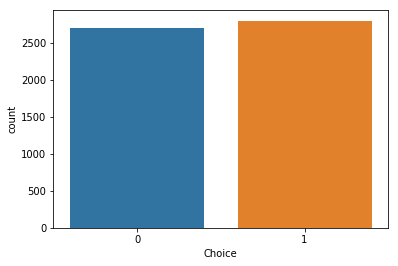

In [9]:
import seaborn as sns
sns.countplot(train['Choice'], label = 'Influencer')


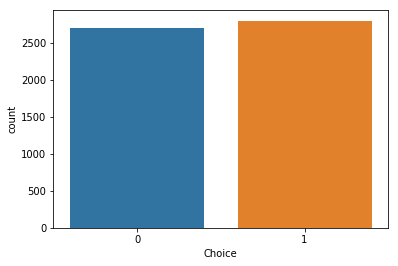

In [10]:
import seaborn as sns
sns.countplot(X_A['Choice'], label = 'Influencer')


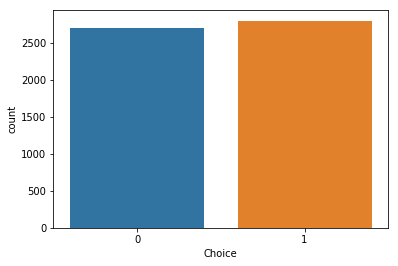

In [11]:
import seaborn as sns
sns.countplot(X_B['Choice'], label = 'Influencer')


In [12]:
X_train_A = X_A[['A_following_count','A_posts','A_listed_count']]
X_train_B = X_B[['B_following_count','B_posts','B_listed_count']]
y_train =train['Choice']
print(X_train_A.head(), '\n')
print(X_train_B.head())



   A_following_count    A_posts  A_listed_count
0                302   0.362150               3
1               1179   5.176620             228
2               1215   3.589718             101
3                  7   2.830627               2
4                862  23.861282            2641 

   B_following_count    B_posts  B_listed_count
0              29808   6.988815            1689
1                848   1.070321            1610
2                482   0.603202             206
3              17637  32.101906             278
4               1711   4.563246             181


In [13]:
y_train = np.array(y_train)
X_train_A = np.array(X_train_A)
X_train_B = np.array(X_train_B)

In [14]:
### to convert to log scale 
def lg(X):
    return np.log(1+X)
    

In [15]:
X_train = lg(X_train_A)-lg(X_train_B)
X_train

array([[-4.58883283, -1.76897805, -6.04618945],
       [ 0.32921053,  1.09306767, -1.95088838],
       [ 0.92330541,  1.0518156 , -0.70774598],
       ...,
       [-0.93218745,  0.2992514 ,  1.41339629],
       [-5.18770499,  0.46090686, -3.6957849 ],
       [-1.21583278, -0.38449887, -7.5091787 ]])

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
test = pd.read_csv('test.csv')
test.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 22 columns):
A_follower_count       5952 non-null int64
A_following_count      5952 non-null int64
A_listed_count         5952 non-null int64
A_mentions_received    5952 non-null float64
A_retweets_received    5952 non-null float64
A_mentions_sent        5952 non-null float64
A_retweets_sent        5952 non-null float64
A_posts                5952 non-null float64
A_network_feature_1    5952 non-null int64
A_network_feature_2    5952 non-null float64
A_network_feature_3    5952 non-null float64
B_follower_count       5952 non-null int64
B_following_count      5952 non-null int64
B_listed_count         5952 non-null int64
B_mentions_received    5952 non-null float64
B_retweets_received    5952 non-null float64
B_mentions_sent        5952 non-null float64
B_retweets_sent        5952 non-null float64
B_posts                5952 non-null float64
B_network_feature_1    5952 non-null int64
B_network

In [19]:
X_test_A = test[['A_following_count','A_posts','A_listed_count']]
X_test_B = test[['B_following_count','B_posts','B_listed_count']]
print(X_test_A.head(), '\n')
print(X_test_B.head())


   A_following_count    A_posts  A_listed_count
0                400   4.094488            5729
1              10723   3.467754            1279
2               3341   3.802143              85
3               1259   7.488116              31
4                331  16.281502           15647 

   B_following_count     B_posts  B_listed_count
0                563    6.241806           20057
1              12949   12.106662            1311
2                320    7.044735            3673
3               3599    1.614287            1072
4             147521  193.072418           15043


In [20]:
X_test_A = np.array(X_test_A)
X_test_B = np.array(X_test_B)

In [21]:
### to convert to log scale 
def lg(X):
    return np.log(1+X)
    

In [22]:
X_test = lg(X_test_A)-lg(X_test_B)
X_test

array([[-0.34109282, -0.35171153, -1.25291255],
       [-0.18861157, -1.0762348 , -0.02469261],
       [ 2.34288359, -0.51595542, -3.75468897],
       ...,
       [ 1.89392339, -0.54699371, -0.29079407],
       [-1.42266201,  0.36221574,  0.02027595],
       [ 0.31429572, -0.4625274 , -1.14981815]])

In [30]:
y_pred = lr.predict(X_test)
y_pred[:10]



array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [31]:
y_test_data = pd.read_csv('sample_predictions.csv')
y_test_data.head()

,Id,Choice
0,1,0.315025
1,2,0.474330
2,3,0.098802
3,4,0.137932
4,5,0.523677


In [32]:
y_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 2 columns):
Id        5952 non-null int64
Choice    5952 non-null float64
dtypes: float64(1), int64(1)
memory usage: 93.0 KB


In [38]:
y_test =[]
for line in y_test_data['Choice'] :
    val = float(line)
    if val > 0.5:
        y_test.append(1)
    else:
            y_test.append(0)

    y_test[:10]


[0, 0, 0, 0, 1, 0, 1, 1, 0, 1]

In [34]:
logistic_confusion_matrix = confusion_matrix(y_test , y_pred)

In [35]:
accuracy = accuracy_score(y_test, y_pred)

Logistic Regression accuracy:  0.9314516129032258
Confusuon Matrix : 
 [[2713  241]
 [ 167 2831]]


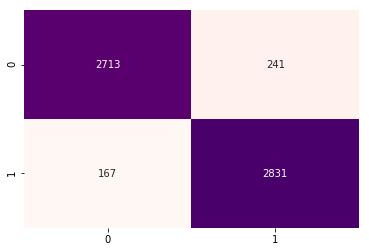

Classification report:
              precision    recall  f1-score   support

          0       0.94      0.92      0.93      2954
          1       0.92      0.94      0.93      2998

avg / total       0.93      0.93      0.93      5952



In [36]:
print("Logistic Regression accuracy: ",accuracy)
print('Confusuon Matrix : \n', logistic_confusion_matrix)
import seaborn as sns
sns.heatmap(logistic_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()
print('Classification report:\n',classification_report(y_test,y_pred))

In [33]:
y_pred = rf.predict(X_test)

In [34]:
rf_confusion_matrix = confusion_matrix(y_test , y_pred)
accuracy = accuracy_score(y_test, y_pred)

Random Forest accuracy:  0.8482862903225806
Confusuon Matrix : 
 [[2503  451]
 [ 452 2546]]


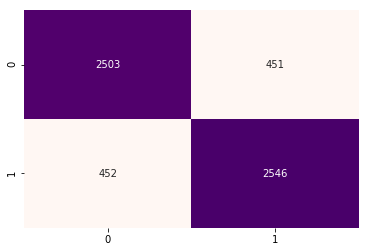

Classification report:
              precision    recall  f1-score   support

          0       0.85      0.85      0.85      2954
          1       0.85      0.85      0.85      2998

avg / total       0.85      0.85      0.85      5952



In [35]:
print("Random Forest accuracy: ",accuracy)
print('Confusuon Matrix : \n', rf_confusion_matrix)
import seaborn as sns
sns.heatmap(rf_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()
print('Classification report:\n',classification_report(y_test,y_pred))
